##### O presente case tem como objetivo analisar dados históricos de reservas de um hotel e estruturar um conjunto de hipóteses e iniciativas capazes de orientar estratégias para elevar a receita anual em 20%. A partir da base de dados disponibilizada, busca-se compreender o comportamento da demanda, identificar padrões relevantes e reconhecer oportunidades de melhoria no desempenho financeiro.

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Times New Roman'

In [4]:
df_hotel = pd.read_excel('Case Hotel BA.xlsx', sheet_name='Base de Dados')
df_hotel

,reserva_cancelada,tempo_antecedencia,data_chegada,ano_chegada,mes_chegada,diadomes_chegada,nro_noites_fds,nro_noites_dds,adultos,criancas,...,país,segmento_mercado,cliente_recorrente,tipo_quarto,tipo_pgto,agencia_turismo,receita_por_noite,pedidos_especiais,status_reserva,data_status_reserva
0,1,75,2015-07-01,2015,7,1,0,3,2,0,...,PRT,AT Offline,0,D,Sem pgto,15.0,105.50,0,Cancelada,2015-04-22
1,1,85,2015-07-01,2015,7,1,0,3,2,0,...,PRT,AT Online,0,A,Sem pgto,240.0,82.00,1,Cancelada,2015-05-06
2,1,60,2015-07-01,2015,7,1,2,5,2,0,...,PRT,AT Online,0,E,Sem pgto,240.0,107.00,2,Cancelada,2015-05-11
3,1,96,2015-07-01,2015,7,1,2,8,2,0,...,PRT,Direta,0,E,Sem pgto,NaN,108.30,2,Cancelada,2015-05-29
4,1,23,2015-07-01,2015,7,1,0,4,2,0,...,PRT,AT Online,0,E,Sem pgto,240.0,123.00,0,Cancelada,2015-06-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39854,0,227,2017-08-31,2017,8,31,2,5,2,1,...,CN,AT Online,0,A,Sem pgto,241.0,125.58,1,Confirmada,2017-09-07
39855,0,217,2017-08-31,2017,8,31,2,7,2,0,...,GBR,AT Offline,0,D,Sem pgto,40.0,110.80,0,Confirmada,2017-09-09
39856,0,212,2017-08-31,2017,8,31,2,8,2,1,...,GBR,AT Offline,0,A,Sem pgto,143.0,89.75,0,Confirmada,2017-09-10
39857,0,211,2017-08-31,2017,8,31,4,10,2,0,...,GBR,AT Offline,0,D,Sem pgto,40.0,112.80,1,Confirmada,2017-09-14


In [ ]:
df_hotel.describe()

,reserva_cancelada,tempo_antecedencia,data_chegada,ano_chegada,diadomes_chegada,nro_noites_fds,nro_noites_dds,adultos,criancas,bebes,cliente_recorrente,agencia_turismo,receita_por_noite,pedidos_especiais,data_status_reserva
count,39859.000000,39859.000000,39858,39859.000000,39859.000000,39859.000000,39859.000000,39859.000000,39859.000000,39859.000000,39859.000000,31801.000000,39859.000000,39859.000000,39859
mean,0.278206,93.042098,2016-08-15 12:37:53.912388864,2016.121252,15.814195,1.193382,3.136105,1.868562,0.129005,0.013874,0.044156,217.709192,95.413312,0.619007,2016-07-28 08:31:59.807320832
min,0.000000,0.000000,2015-07-01 00:00:00,2015.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-6.380000,0.000000,2014-11-18 00:00:00
25%,0.000000,10.000000,2016-02-14 00:00:00,2016.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,240.000000,50.400000,0.000000,2016-01-26 00:00:00
50%,0.000000,58.000000,2016-08-19 00:00:00,2016.000000,16.000000,1.000000,3.000000,2.000000,0.000000,0.000000,0.000000,240.000000,75.650000,0.000000,2016-07-31 00:00:00
75%,1.000000,155.000000,2017-03-05 00:00:00,2017.000000,24.000000,2.000000,5.000000,2.000000,0.000000,0.000000,0.000000,242.000000,125.500000,1.000000,2017-02-11 00:00:00
max,1.000000,737.000000,2017-08-31 00:00:00,2017.000000,31.000000,19.000000,50.000000,55.000000,10.000000,2.000000,1.000000,535.000000,508.000000,5.000000,2017-09-14 00:00:00
std,0.448121,97.365069,NaN,0.722550,8.884775,1.147829,2.461957,0.697594,0.445839,0.118884,0.205443,88.115646,61.245616,0.813391,NaN


In [ ]:
# corrigindo a coluna mes_chegada e data_chegada
df_hotel['mes_chegada'] = pd.to_numeric(df_hotel['mes_chegada'], errors='coerce')
df_hotel['mes_chegada'] = df_hotel['mes_chegada'].ffill().astype(int)
df_hotel['data_chegada'] = pd.to_datetime(df_hotel[['ano_chegada', 'mes_chegada', 'diadomes_chegada']].rename(columns={'ano_chegada': 'year', 'mes_chegada': 'month', 'diadomes_chegada': 'day'}))
df_hotel

,reserva_cancelada,tempo_antecedencia,data_chegada,ano_chegada,mes_chegada,diadomes_chegada,nro_noites_fds,nro_noites_dds,adultos,criancas,...,país,segmento_mercado,cliente_recorrente,tipo_quarto,tipo_pgto,agencia_turismo,receita_por_noite,pedidos_especiais,status_reserva,data_status_reserva
0,1,75,2015-07-01,2015,7,1,0,3,2,0,...,PRT,AT Offline,0,D,Sem pgto,15.0,105.50,0,Cancelada,2015-04-22
1,1,85,2015-07-01,2015,7,1,0,3,2,0,...,PRT,AT Online,0,A,Sem pgto,240.0,82.00,1,Cancelada,2015-05-06
2,1,60,2015-07-01,2015,7,1,2,5,2,0,...,PRT,AT Online,0,E,Sem pgto,240.0,107.00,2,Cancelada,2015-05-11
3,1,96,2015-07-01,2015,7,1,2,8,2,0,...,PRT,Direta,0,E,Sem pgto,NaN,108.30,2,Cancelada,2015-05-29
4,1,23,2015-07-01,2015,7,1,0,4,2,0,...,PRT,AT Online,0,E,Sem pgto,240.0,123.00,0,Cancelada,2015-06-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39854,0,227,2017-08-31,2017,8,31,2,5,2,1,...,CN,AT Online,0,A,Sem pgto,241.0,125.58,1,Confirmada,2017-09-07
39855,0,217,2017-08-31,2017,8,31,2,7,2,0,...,GBR,AT Offline,0,D,Sem pgto,40.0,110.80,0,Confirmada,2017-09-09
39856,0,212,2017-08-31,2017,8,31,2,8,2,1,...,GBR,AT Offline,0,A,Sem pgto,143.0,89.75,0,Confirmada,2017-09-10
39857,0,211,2017-08-31,2017,8,31,4,10,2,0,...,GBR,AT Offline,0,D,Sem pgto,40.0,112.80,1,Confirmada,2017-09-14


# Proposta 1: diagnóstico cancelamento/no-show

In [19]:
print("A taxa de cancelamento é de {:.2f}%".format((df_hotel['reserva_cancelada'].sum() / len(df_hotel)) * 100))
pd.crosstab(df_hotel['reserva_cancelada'], df_hotel['status_reserva'])

A taxa de cancelamento é de 27.82%


status_reserva,Ausente,Cancelada,Confirmada
reserva_cancelada,,,
0,0,0,28770
1,287,10802,0


In [ ]:
df_cancelado = df_hotel[df_hotel['reserva_cancelada'] == 1]
distribuicao_cancelamento = df_cancelado['status_reserva'].value_counts(normalize=True) * 100

print("Distribuição dos tipos de cancelamento (como % do total de cancelamentos):")
print(distribuicao_cancelamento)

Distribuição dos tipos de cancelamento (como % do total de cancelamentos):
status_reserva
Cancelada    97.41185
Ausente       2.58815
Name: proportion, dtype: float64


In [27]:
cancelamento_por_pgto = pd.crosstab(df_cancelado['tipo_pgto'], df_cancelado['status_reserva'], normalize='index') * 100
print("Porcentagem de 'Ausente' e 'Cancelada' por tipo de pagamento (como % dos cancelamentos para esse tipo):")
print(cancelamento_por_pgto)

Porcentagem de 'Ausente' e 'Cancelada' por tipo de pagamento (como % dos cancelamentos para esse tipo):
status_reserva          Ausente  Cancelada
tipo_pgto                                 
Pgto não reembolsável  1.090909  98.909091
Pgto reembolsável      4.545455  95.454545
Sem pgto               2.845917  97.154083


In [28]:
cancelamento_por_pgto = pd.crosstab(df_cancelado['tipo_pgto'], df_cancelado['status_reserva'])
print(cancelamento_por_pgto)

status_reserva         Ausente  Cancelada
tipo_pgto                                
Pgto não reembolsável       18       1632
Pgto reembolsável            1         21
Sem pgto                   268       9149


In [29]:
porcentagem_cancelada_por_pgto = (cancelamento_por_pgto['Cancelada'] / cancelamento_por_pgto['Cancelada'].sum()) * 100
print("Porcentagem de cancelamentos por tipo de pagamento (em relação ao total de 'Cancelada'):")
print(porcentagem_cancelada_por_pgto)

Porcentagem de cancelamentos por tipo de pagamento (em relação ao total de 'Cancelada'):
tipo_pgto
Pgto não reembolsável    15.108313
Pgto reembolsável         0.194408
Sem pgto                 84.697278
Name: Cancelada, dtype: float64


In [30]:
porcentagem_ausente_por_pgto = (cancelamento_por_pgto['Ausente'] / cancelamento_por_pgto['Ausente'].sum()) * 100
print("Porcentagem de cancelamentos por tipo de pagamento (em relação ao total de 'Ausente'):")
print(porcentagem_ausente_por_pgto)

Porcentagem de cancelamentos por tipo de pagamento (em relação ao total de 'Ausente'):
tipo_pgto
Pgto não reembolsável     6.271777
Pgto reembolsável         0.348432
Sem pgto                 93.379791
Name: Ausente, dtype: float64


In [ ]:
df_com_agencia = df_hotel[df_hotel['agencia_turismo'].notnull()]
df_sem_agencia = df_hotel[df_hotel['agencia_turismo'].isnull()]

taxa_cancelamento_com_agencia = (df_com_agencia['reserva_cancelada'].sum() / len(df_com_agencia)) * 100
taxa_cancelamento_sem_agencia = (df_sem_agencia['reserva_cancelada'].sum() / len(df_sem_agencia)) * 100

print("Taxa de cancelamento quando há uma agência de turismo: {:.1f}%".format(taxa_cancelamento_com_agencia))
print("Taxa de cancelamento quando não há agência de turismo: {:.1f}%".format(taxa_cancelamento_sem_agencia))
print("Quantidade de cancelamentos quando há uma agência de turismo:", df_com_agencia['reserva_cancelada'].sum() )
print("Quantidade de cancelamentos quando não há agência de turismo:", df_sem_agencia['reserva_cancelada'].sum() )

Taxa de cancelamento quando há uma agência de turismo: 30.5%
Taxa de cancelamento quando não há agência de turismo: 17.3%
Quantidade de cancelamentos quando há uma agência de turismo: 9695
Quantidade de cancelamentos quando não há agência de turismo: 1394


In [47]:
agencia_stats = df_com_agencia.groupby('agencia_turismo').agg(
    quantidade_reservas=('reserva_cancelada', 'count'),
    quantidade_cancelamentos=('reserva_cancelada', 'sum')
)

print("Quantidade de reservas e cancelamentos por agência de turismo:")
agencia_stats.reset_index('agencia_turismo', inplace=True, drop = False)
agencia_stats = agencia_stats.sort_values(by='quantidade_cancelamentos', ascending=False)
agencia_stats['agencia_turismo'] = agencia_stats['agencia_turismo'].astype(int).astype(str).replace(np.nan, 'Sem Agência')
agencia_stats['taxa_cancelamento'] = (agencia_stats['quantidade_cancelamentos'] / agencia_stats['quantidade_reservas']) * 100
agencia_stats.sort_values(by='quantidade_cancelamentos', ascending=False, inplace=True)
agencia_stats

Quantidade de reservas e cancelamentos por agência de turismo:


,agencia_turismo,quantidade_reservas,quantidade_cancelamentos,taxa_cancelamento
73,240,13904,5483,39.434695
81,250,2869,513,17.880795
75,242,779,260,33.376123
33,96,535,244,45.607477
74,241,1721,236,13.712958
...,...,...,...,...
130,367,1,0,0.000000
143,418,8,0,0.000000
94,282,2,0,0.000000
57,167,1,0,0.000000


In [49]:
cancelamentos_agencia_240 = agencia_stats[agencia_stats['agencia_turismo'] == '240']['quantidade_cancelamentos'].sum()
total_cancelamentos = agencia_stats['quantidade_cancelamentos'].sum()
porcentagem_agencia_240 = (cancelamentos_agencia_240 / total_cancelamentos) * 100

print(f"A porcentagem de cancelamentos da agência 240 sobre o total de cancelamentos é: {porcentagem_agencia_240:.1f}%")

A porcentagem de cancelamentos da agência 240 sobre o total de cancelamentos é: 56.6%


In [53]:
agencias_alta_taxa = agencia_stats[agencia_stats['taxa_cancelamento'] > 20.0]
print(f"Quantidade de agências com taxa de cancelamento acima de 20%: {len(agencias_alta_taxa)}, cerca de {len(agencias_alta_taxa) / len(agencia_stats) * 100:.1f}% do total")

Quantidade de agências com taxa de cancelamento acima de 20%: 59, cerca de 32.4% do total


C:\Users\linde\AppData\Local\Temp\ipykernel_21360\201085371.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  taxa_cancelamento_antecedencia = df_hotel.groupby('faixa_antecedencia').agg(


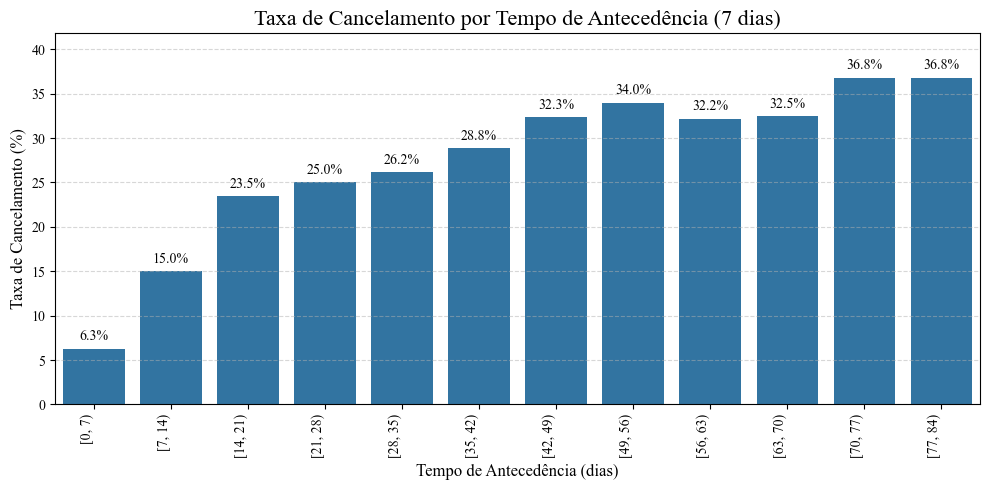

In [84]:
bin_width = 7

bins = np.arange(0, bin_width*12+1, bin_width)
df_hotel['faixa_antecedencia'] = pd.cut(df_hotel['tempo_antecedencia'], bins=bins, right=False)

taxa_cancelamento_antecedencia = df_hotel.groupby('faixa_antecedencia').agg(
    total_reservas=('reserva_cancelada', 'count'),
    total_cancelamentos=('reserva_cancelada', 'sum')
)
taxa_cancelamento_antecedencia['taxa_cancelamento'] = (taxa_cancelamento_antecedencia['total_cancelamentos'] / taxa_cancelamento_antecedencia['total_reservas']) * 100
taxa_cancelamento_antecedencia.dropna(inplace=True)


plt.figure(figsize=(10, 5))
ax = sns.barplot(x=taxa_cancelamento_antecedencia.index.astype(str), y='taxa_cancelamento', data=taxa_cancelamento_antecedencia)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f') + '%', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.ylim(0, taxa_cancelamento_antecedencia['taxa_cancelamento'].max() + 5)
plt.title('Taxa de Cancelamento por Tempo de Antecedência (7 dias)', fontsize=16)
plt.xlabel('Tempo de Antecedência (dias)', fontsize=12)
plt.ylabel('Taxa de Cancelamento (%)', fontsize=12)
plt.xticks(rotation=90, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

C:\Users\linde\AppData\Local\Temp\ipykernel_21360\1642847165.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  taxa_cancelamento_antecedencia = df_hotel.groupby('faixa_antecedencia').agg(


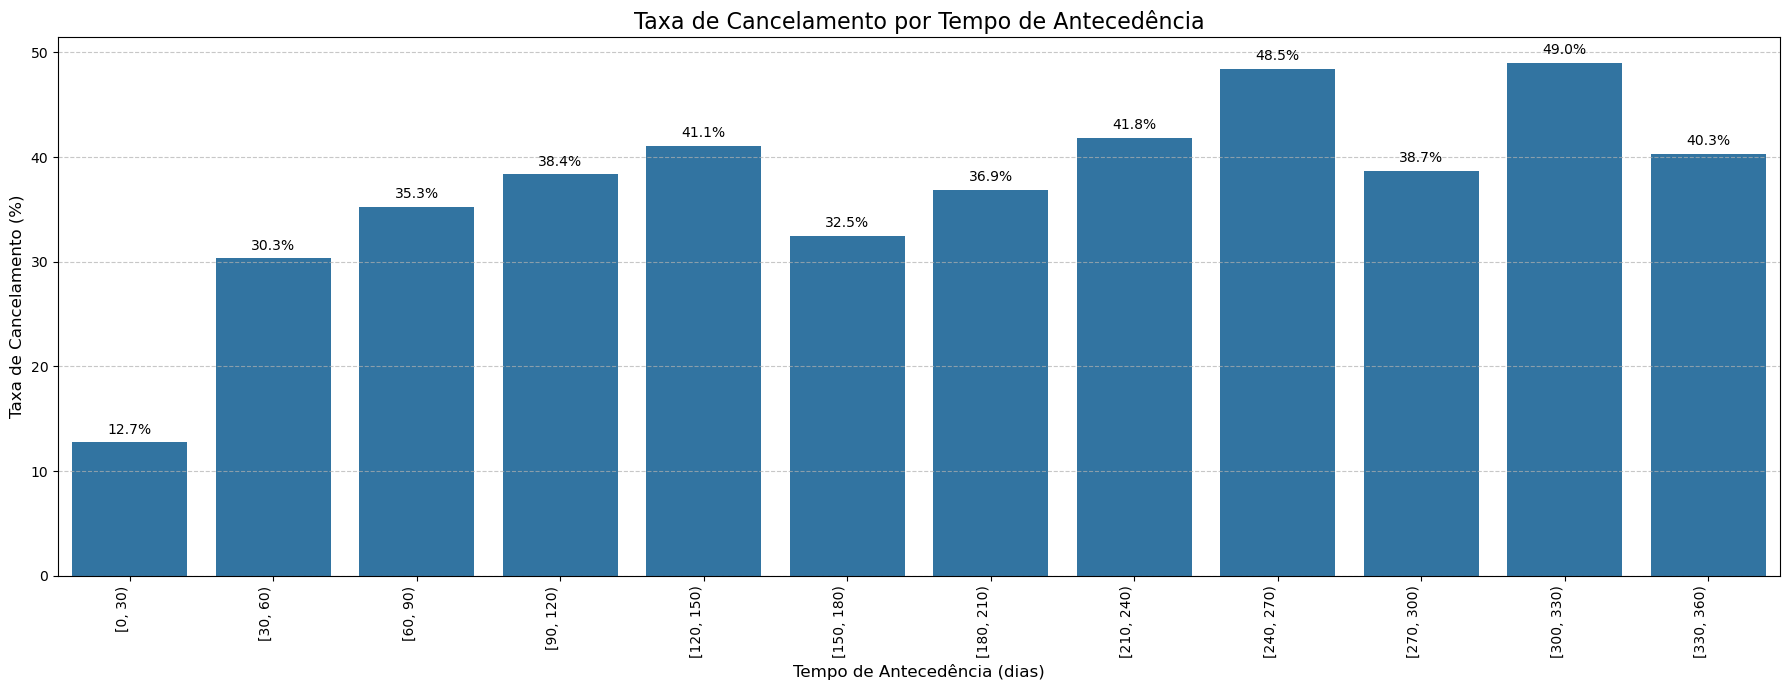

In [73]:
bin_width = 30

bins = np.arange(0, bin_width*13, bin_width)
df_hotel['faixa_antecedencia'] = pd.cut(df_hotel['tempo_antecedencia'], bins=bins, right=False)

taxa_cancelamento_antecedencia = df_hotel.groupby('faixa_antecedencia').agg(
    total_reservas=('reserva_cancelada', 'count'),
    total_cancelamentos=('reserva_cancelada', 'sum')
)
taxa_cancelamento_antecedencia['taxa_cancelamento'] = (taxa_cancelamento_antecedencia['total_cancelamentos'] / taxa_cancelamento_antecedencia['total_reservas']) * 100
taxa_cancelamento_antecedencia.dropna(inplace=True)


plt.figure(figsize=(18, 7))
ax = sns.barplot(x=taxa_cancelamento_antecedencia.index.astype(str), y='taxa_cancelamento', data=taxa_cancelamento_antecedencia)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f') + '%', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.title('Taxa de Cancelamento por Tempo de Antecedência', fontsize=16)
plt.xlabel('Tempo de Antecedência (dias)', fontsize=12)
plt.ylabel('Taxa de Cancelamento (%)', fontsize=12)
plt.xticks(rotation=90, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\linde\AppData\Local\Temp\ipykernel_21360\1364251333.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cancelado['total_noites'] = df_cancelado['nro_noites_fds'] + df_cancelado['nro_noites_dds']


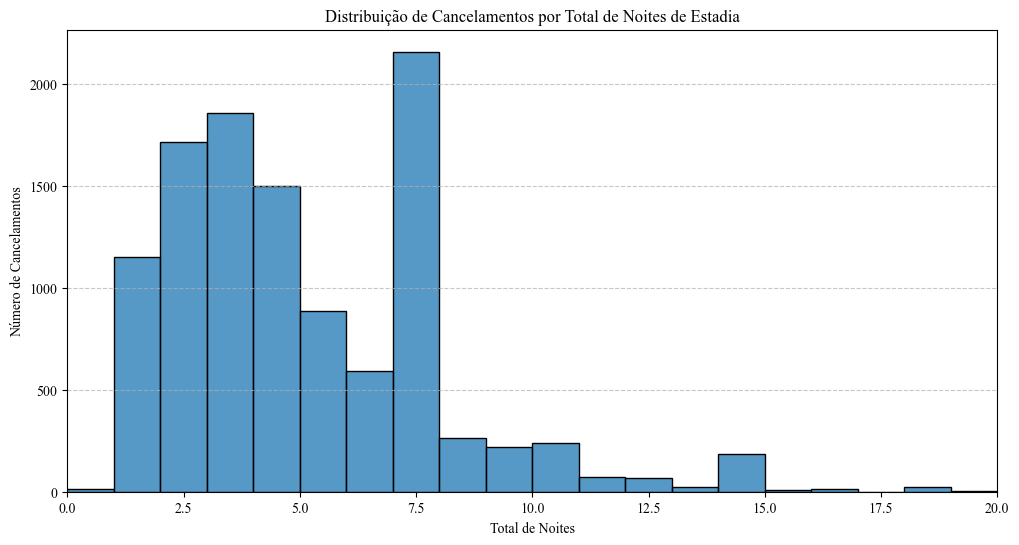

In [85]:
df_cancelado['total_noites'] = df_cancelado['nro_noites_fds'] + df_cancelado['nro_noites_dds']

plt.figure(figsize=(12, 6))
sns.histplot(data=df_cancelado, x='total_noites', binwidth=1, kde=False)
plt.title('Distribuição de Cancelamentos por Total de Noites de Estadia')
plt.xlabel('Total de Noites')
plt.ylabel('Número de Cancelamentos')
plt.xlim(0, 20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

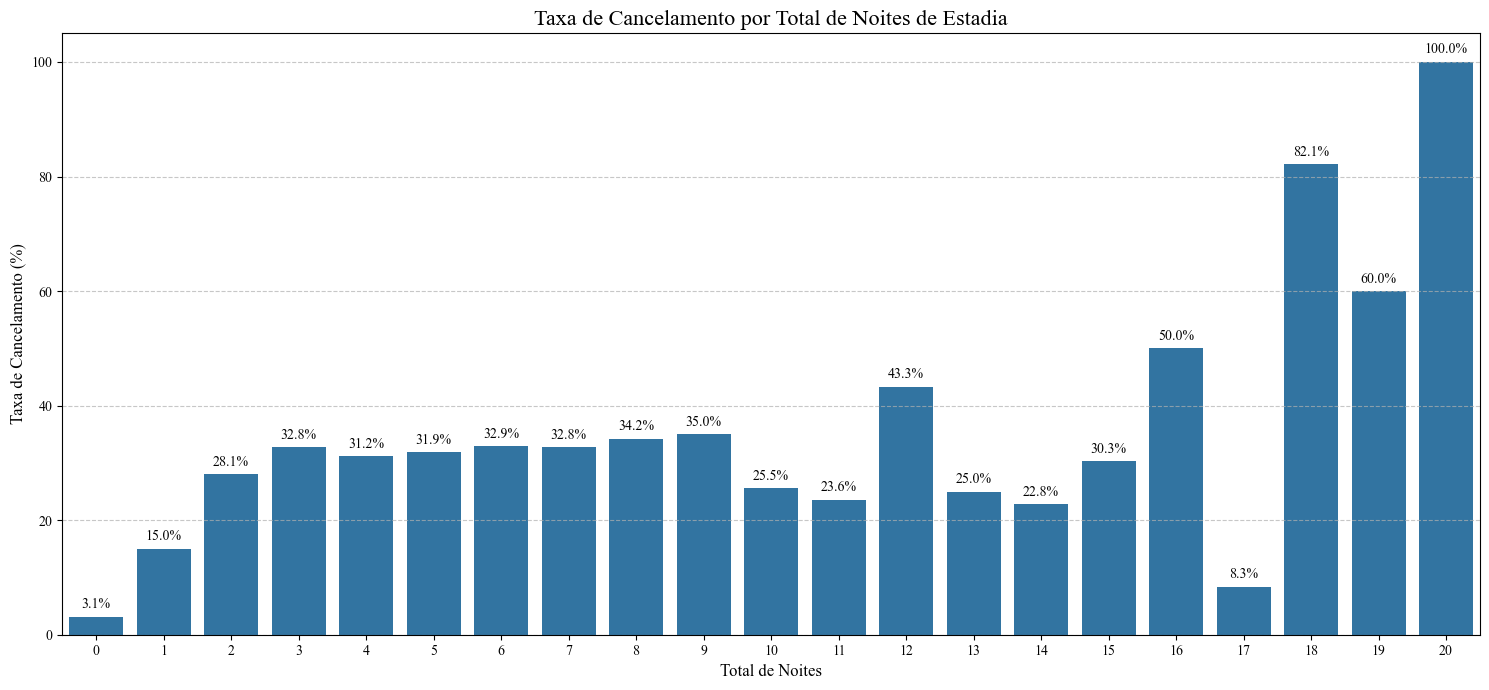

In [86]:
df_hotel['total_noites'] = df_hotel['nro_noites_fds'] + df_hotel['nro_noites_dds']

taxa_cancelamento_noites = df_hotel.groupby('total_noites').agg(
    total_reservas=('reserva_cancelada', 'count'),
    total_cancelamentos=('reserva_cancelada', 'sum')
)
taxa_cancelamento_noites['taxa_cancelamento'] = (taxa_cancelamento_noites['total_cancelamentos'] / taxa_cancelamento_noites['total_reservas']) * 100

taxa_cancelamento_noites_filtrado = taxa_cancelamento_noites[taxa_cancelamento_noites.index <= 20]

plt.figure(figsize=(15, 7))
ax = sns.barplot(x=taxa_cancelamento_noites_filtrado.index, y='taxa_cancelamento', data=taxa_cancelamento_noites_filtrado)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f') + '%', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.title('Taxa de Cancelamento por Total de Noites de Estadia', fontsize=16)
plt.xlabel('Total de Noites', fontsize=12)
plt.ylabel('Taxa de Cancelamento (%)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

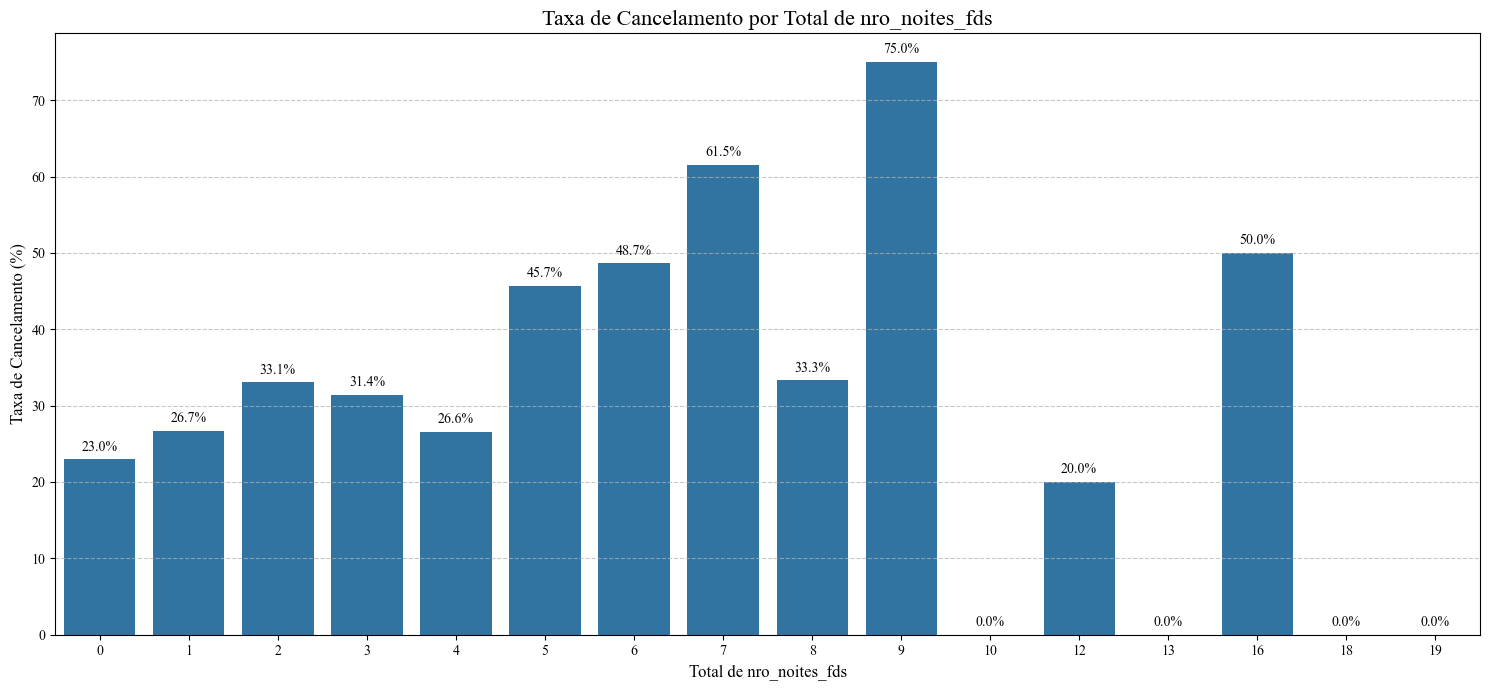

In [90]:
taxa_cancelamento_fds = df_hotel.groupby('nro_noites_fds').agg(
    total_reservas=('reserva_cancelada', 'count'),
    total_cancelamentos=('reserva_cancelada', 'sum')
)
taxa_cancelamento_fds['taxa_cancelamento'] = (taxa_cancelamento_fds['total_cancelamentos'] / taxa_cancelamento_fds['total_reservas']) * 100
# taxa_cancelamento_fds_filtrado = taxa_cancelamento_fds[taxa_cancelamento_fds.index <= 20]

plt.figure(figsize=(15, 7))
ax = sns.barplot(x=taxa_cancelamento_fds.index, y='taxa_cancelamento', data=taxa_cancelamento_fds)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f') + '%', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.title('Taxa de Cancelamento por Total de nro_noites_fds', fontsize=16)
plt.xlabel('Total de nro_noites_fds', fontsize=12)
plt.ylabel('Taxa de Cancelamento (%)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

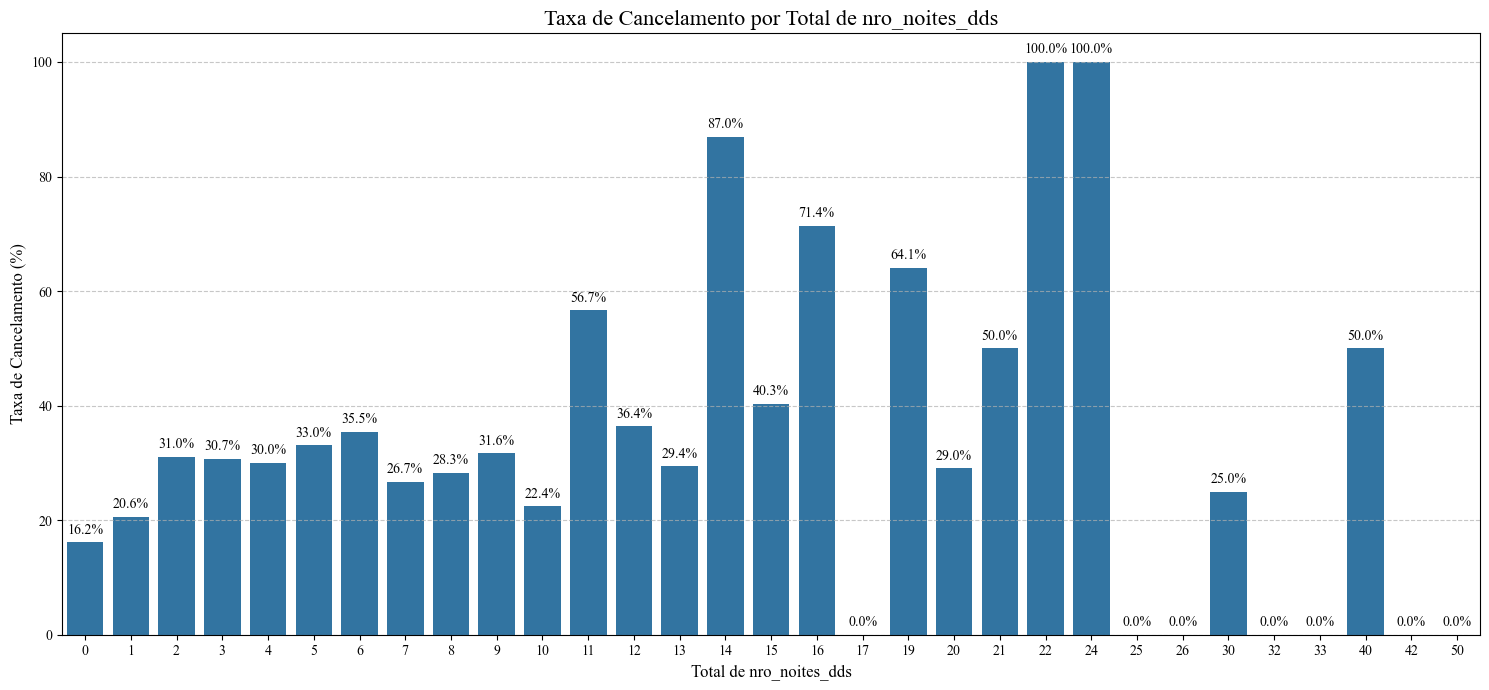

In [91]:

taxa_cancelamento_dds = df_hotel.groupby('nro_noites_dds').agg(
    total_reservas=('reserva_cancelada', 'count'),
    total_cancelamentos=('reserva_cancelada', 'sum')
)
taxa_cancelamento_dds['taxa_cancelamento'] = (taxa_cancelamento_dds['total_cancelamentos'] / taxa_cancelamento_dds['total_reservas']) * 100
# taxa_cancelamento_dds_filtrado = taxa_cancelamento_dds[taxa_cancelamento_dds.index <= 20]

plt.figure(figsize=(15, 7))
ax = sns.barplot(x=taxa_cancelamento_dds.index, y='taxa_cancelamento', data=taxa_cancelamento_dds)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f') + '%', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.title('Taxa de Cancelamento por Total de nro_noites_dds', fontsize=16)
plt.xlabel('Total de nro_noites_dds', fontsize=12)
plt.ylabel('Taxa de Cancelamento (%)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [93]:
taxa_cancelamento_segmento_recorrente = df_hotel.groupby(['segmento_mercado', 'cliente_recorrente']).agg(
    total_reservas=('reserva_cancelada', 'count'),
    total_cancelamentos=('reserva_cancelada', 'sum')
)

taxa_cancelamento_segmento_recorrente['taxa_cancelamento'] = (taxa_cancelamento_segmento_recorrente['total_cancelamentos'] / taxa_cancelamento_segmento_recorrente['total_reservas']) * 100

taxa_cancelamento_segmento_recorrente

total_reservas  total_cancelamentos  \
segmento_mercado cliente_recorrente                                        
AT Offline       0                             7312                 1120   
                 1                              160                   18   
AT Online        0                            17364                 6233   
                 1                              365                   15   
Corporativo      0                             1748                  327   
                 1                              561                   24   
Direta           0                             5908                  854   
                 1                              605                   24   
Grupos           0                             5767                 2444   
                 1                               69                   30   

                                     taxa_cancelamento  
segmento_mercado cliente_recorrente                     
AT Offline       0                           15.317287  
                 1                           11.250000  
AT Online        0                           35.896107  
                 1                            4.109589  
Corporativo      0                           18.707094  
                 1                            4.278075  
Direta           0                           14.454976  
                 1                            3.966942  
Grupos           0                           42.379053  
                 1                           43.478261

In [96]:
taxa_cancelamento_segmento = df_hotel.groupby(['segmento_mercado']).agg(
    total_reservas=('reserva_cancelada', 'count'),
    total_cancelamentos=('reserva_cancelada', 'sum')
)

taxa_cancelamento_segmento['taxa_cancelamento'] = (taxa_cancelamento_segmento['total_cancelamentos'] / taxa_cancelamento_segmento['total_reservas']) * 100

taxa_cancelamento_segmento.reset_index('segmento_mercado', inplace=True, drop = False)
taxa_cancelamento_segmento

,segmento_mercado,total_reservas,total_cancelamentos,taxa_cancelamento
0,AT Offline,7472,1138,15.230193
1,AT Online,17729,6248,35.241694
2,Corporativo,2309,351,15.201386
3,Direta,6513,878,13.480731
4,Grupos,5836,2474,42.392049


In [98]:
taxa_cancelamento_recorrente = df_hotel.groupby(['cliente_recorrente']).agg(
    total_reservas=('reserva_cancelada', 'count'),
    total_cancelamentos=('reserva_cancelada', 'sum')
)

taxa_cancelamento_recorrente['taxa_cancelamento'] = (taxa_cancelamento_recorrente['total_cancelamentos'] / taxa_cancelamento_recorrente['total_reservas']) * 100

taxa_cancelamento_recorrente.reset_index('cliente_recorrente', inplace=True, drop = False)
taxa_cancelamento_recorrente

,cliente_recorrente,total_reservas,total_cancelamentos,taxa_cancelamento
0,0,38099,10978,28.814405
1,1,1760,111,6.306818


In [101]:
estadias_longas = (df_hotel['total_noites'] > 14).sum()
total_estadias = len(df_hotel)
proporcao = (estadias_longas / total_estadias) * 100

print(f"A proporção de estadias com mais de 14 noites é: {proporcao:.1f}%")

A proporção de estadias com mais de 14 noites é: 0.7%
